# Exercise 3: 

_Learn to clip a satellite image to AOI and reproject into a new CRS_


In [2]:
import rasterio
from matplotlib import pyplot as plt

# This notebook explores a single 4 band (blue, green, red, NIR) PlanetScope scene in a UTM projection.
image_file = "example.tif"

# Use Rasterio to open the image.
satdat = rasterio.open(image_file)

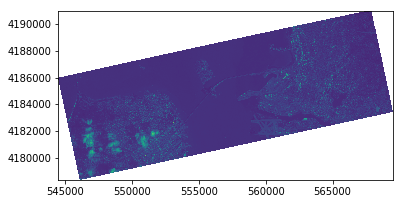

In [27]:
# rasterio.plot.show is a shortcut to matplotlib plotting

from rasterio.plot import show
show(satdat)

In [18]:
# check the metadata - we'll reference the CRS this later

print(satdat.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8341, 'height': 4213, 'count': 4, 'crs': CRS.from_dict(init='epsg:32610'), 'transform': Affine(3.0, 0.0, 544491.0,
       0.0, -3.0, 4191009.0)}


In [5]:
# use rasterio's sister-library for working with vector data
import fiona

# use fiona to open our AOI GeoJSON
with fiona.open('aoi.geojson') as f:
    aoi = [feature["geometry"] for feature in f]

In [16]:
# import rasterio's mask tool
from rasterio.mask import mask

# apply mask with crop=True to cut to boundary
with rasterio.open('example.tif') as img:
    clipped, transform = mask(img, aoi, crop=True)
    
# save the output to a final GeoTIFF

# use the metadata from our original mosaic
meta = img.meta.copy()

# update metadata with new, clipped mosaic's boundaries
meta.update({"transform": transform,
    "height":clipped.shape[1],
    "width":clipped.shape[2]})

# write the output to a GeoTIFF
with rasterio.open('clipped.tif', 'w', **meta) as dst:
    dst.write(clipped)


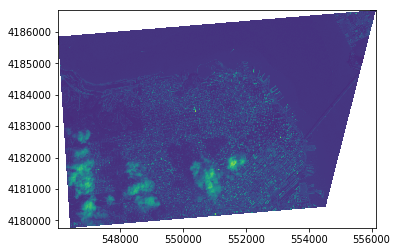

In [26]:
clipped = rasterio.open("clipped.tif")
show(clipped)